Index(['Artist', 'Track', 'Album', 'Album_type', 'Danceability', 'Energy',
       'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness',
       'Liveness', 'Valence', 'Tempo', 'Duration_min', 'Title', 'Channel',
       'Views', 'Likes', 'Comments', 'Licensed', 'official_video', 'Stream',
       'EnergyLiveness', 'most_playedon'],
      dtype='object')
The attribute most correlated with popularity is 'Loudness' with a correlation of 0.12


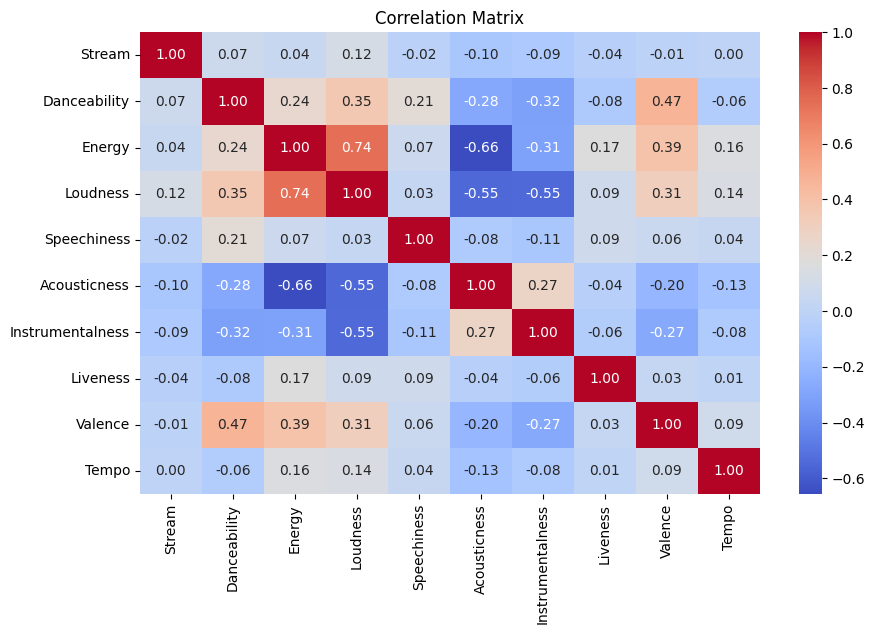

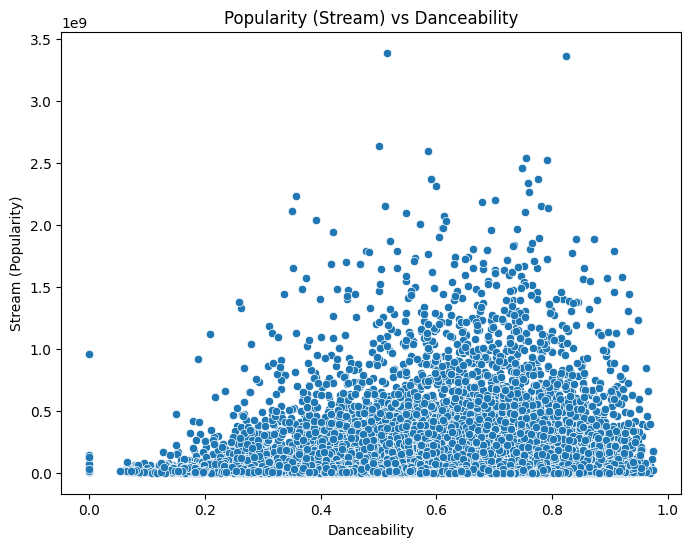

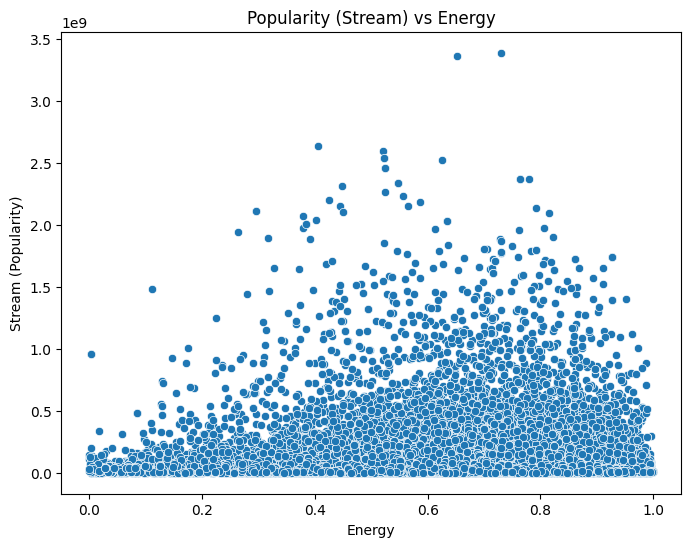

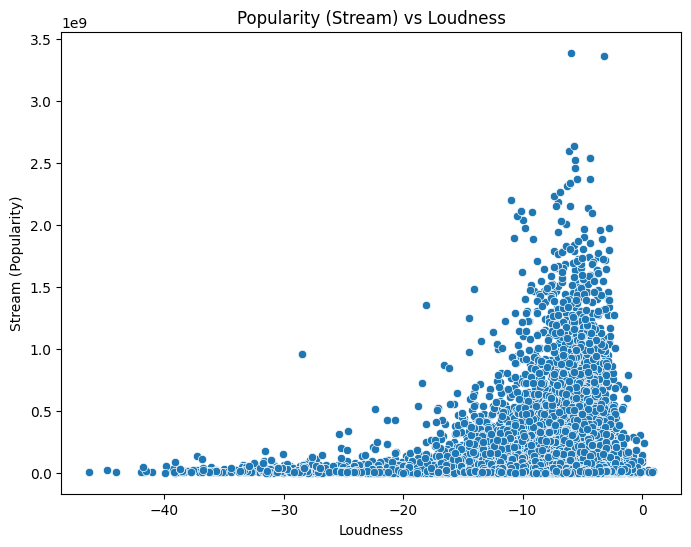

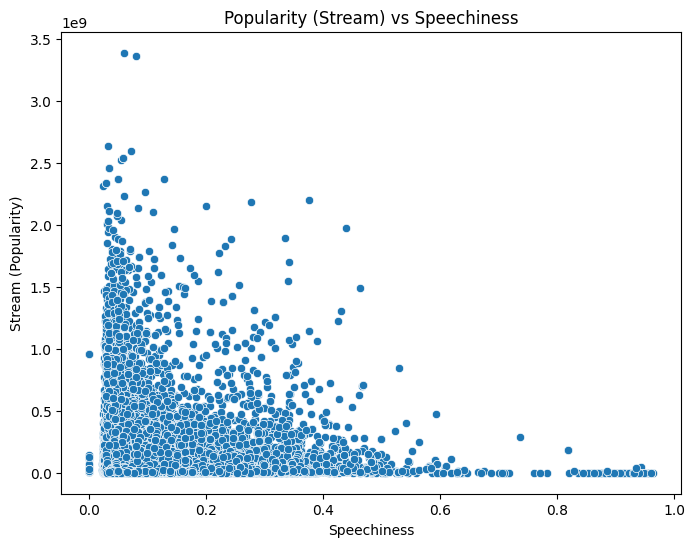

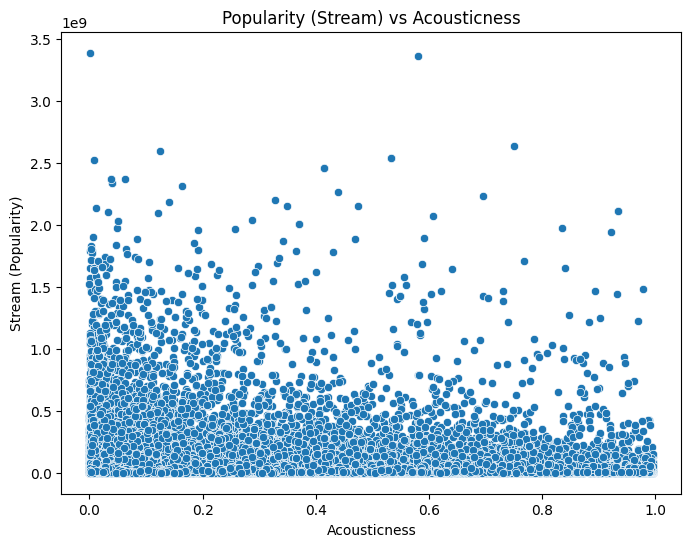

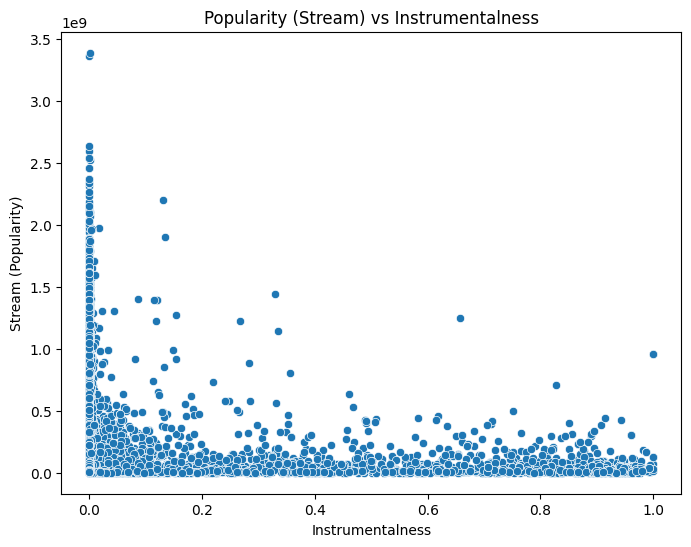

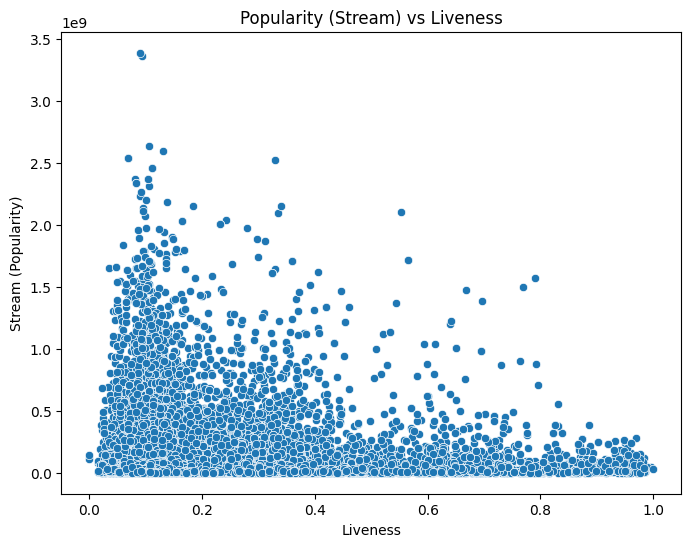

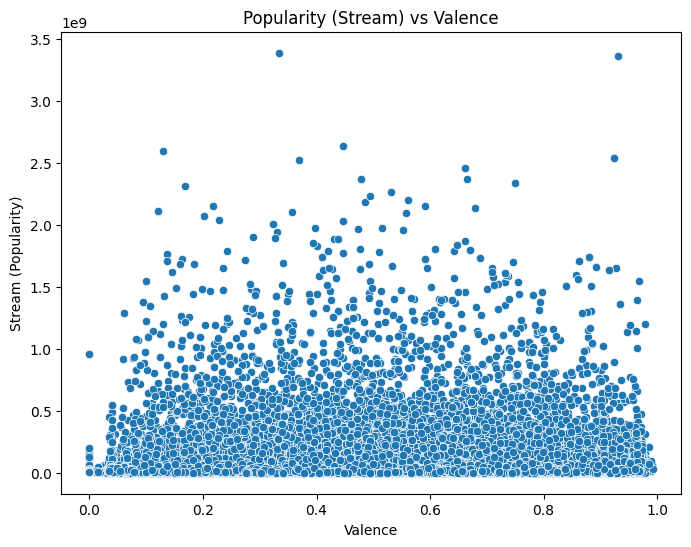

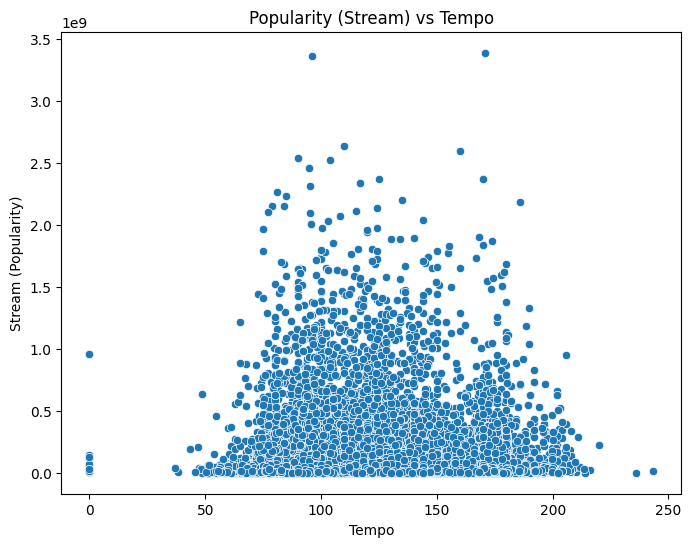

Mean Squared Error: 55746886865418352.00
R-squared: 0.02


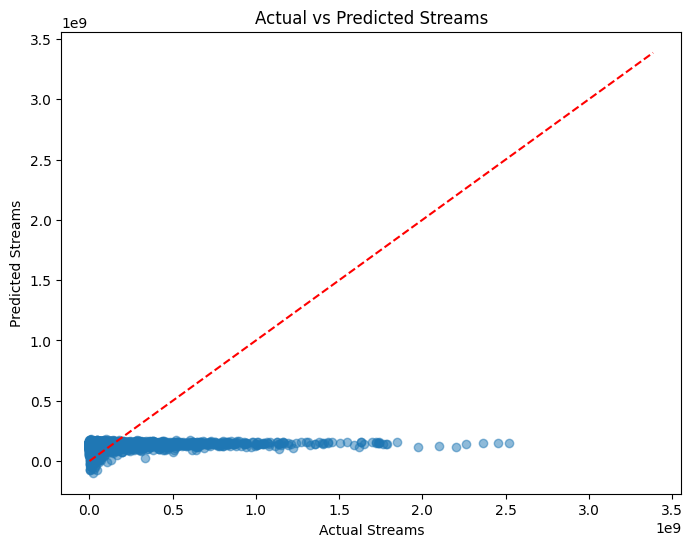

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
dataset_path = 'spotifydata.csv'  # Replace with the actual dataset path
df = pd.read_csv(dataset_path)

# Select relevant columns
columns_of_interest = [
    'Stream', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
    'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'
]
print(df.columns)
df = df[columns_of_interest]

# Drop rows with missing values
df = df.dropna()

# Compute the correlation matrix for the selected attributes
correlation_matrix = df.corr()

# Extract correlations with the 'Stream' column
popularity_corr = correlation_matrix['Stream'].drop('Stream')

# Identify the attribute with the highest absolute correlation to popularity
most_correlated_attribute = popularity_corr.abs().idxmax()
highest_correlation = popularity_corr[most_correlated_attribute]

print(f"The attribute most correlated with popularity is '{most_correlated_attribute}' with a correlation of {highest_correlation:.2f}")

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# Generate scatter plots for each attribute against Stream (popularity)
attributes = ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']

for attribute in attributes:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=attribute, y='Stream')
    plt.title(f'Popularity (Stream) vs {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Stream (Popularity)')
    plt.show()

# Prepare data for modeling
X = df[[most_correlated_attribute]]
y = df['Stream']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Streams')
plt.ylabel('Predicted Streams')
plt.title('Actual vs Predicted Streams')
plt.show()

Sum of Residuals: 19380681804.33809
6962     1.308149e+08
19031   -5.754771e+08
5998     2.371933e+07
9712     5.369294e+07
3844    -3.071118e+07
             ...     
413      1.430088e+08
1175     9.264774e+07
4345     5.957004e+07
8510     4.485985e+07
19490   -1.055206e+09
Name: Stream, Length: 4119, dtype: float64


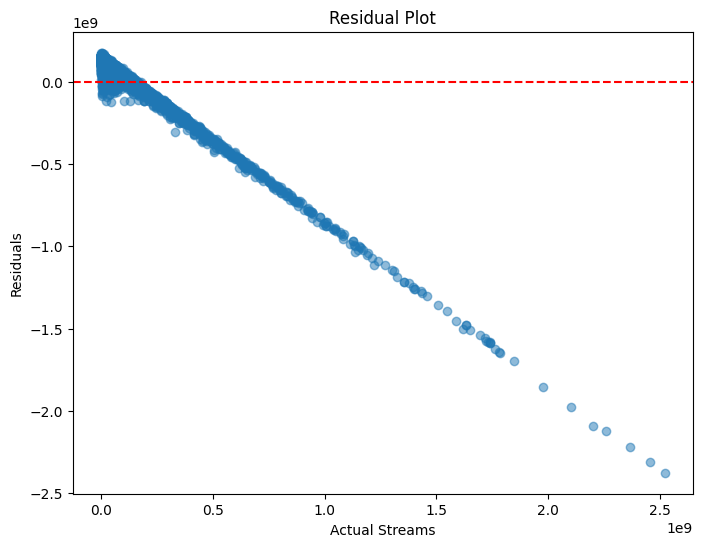

In [ ]:
# calculate "residuals" with (residuals = predicted - actual)

residuals = y_pred - y_test

# Sum of residuals
sum_of_residuals = np.sum(residuals)

# Print the sum of residuals
print(f"Sum of Residuals: {sum_of_residuals}")

print(residuals)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.xlabel('Actual Streams')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

